<h1>LetsGrowMore (LGMVIPFEB2022) - Data Science Intern</h1>
    
<h3>Author: Sourabh Vijay Dohare <br></h3>
<h3>Task1 : Iris Flowers Classification ML Project<br>
Level : Beginner<br>
Language : Python</h3>

<h3>IMPORTING LIBRARIES</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

<h3>READING THE DATA-SET</h3>

In [12]:
df=pd.read_csv("iris.csv")
print("Data imported successfully:")
df.head()


Data imported successfully:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>LOOKING INTO THE SHAPE</h3>

In [13]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('\n')

The dataset has 150 rows and 5 columns




<h3>DESCRIPTIVE SUMMARY OF THE DATASET</h3>

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal_length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal_width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>LOOK INTO THE INFO OF THE DATASET</h3>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3>CHECKING FOR MISSING VALUES</h3>

df.isnull().sum()


<h3>EDA
    


    
<h3>CHECKING FOR OUTLIERS</h3>

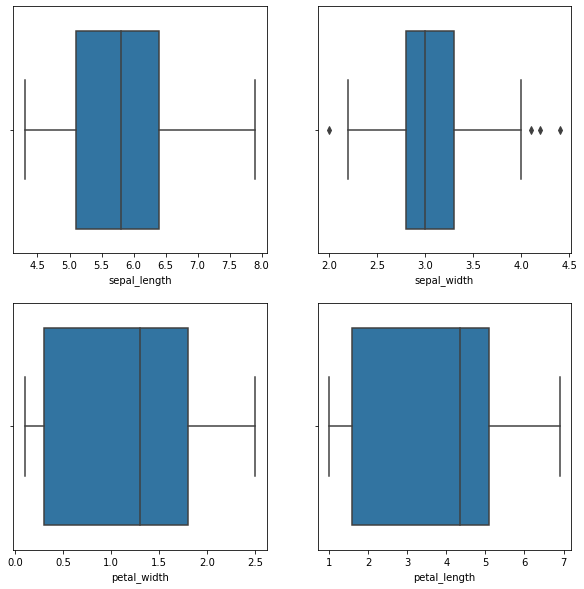

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["sepal_length"])

plt.subplot(2,2,2)
sns.boxplot(x=df["sepal_width"])

plt.subplot(2,2,3)
sns.boxplot(x=df["petal_width"])

plt.subplot(2,2,4)
sns.boxplot(x=df["petal_length"])
plt.show()

<h3>OUTLIER TREATMENT</h3>

In [18]:
print(df['sepal_width'].quantile(0.50)) 
print(df['sepal_width'].quantile(0.95)) 

3.0
3.8


In [19]:
df['sepal_width'] = np.where(df['sepal_width'] >3.8,3, df['sepal_width'])

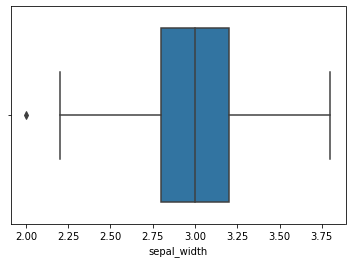

In [20]:
sns.boxplot(x=df["sepal_width"])

<h3>DATA VISUALIZATION</h3>

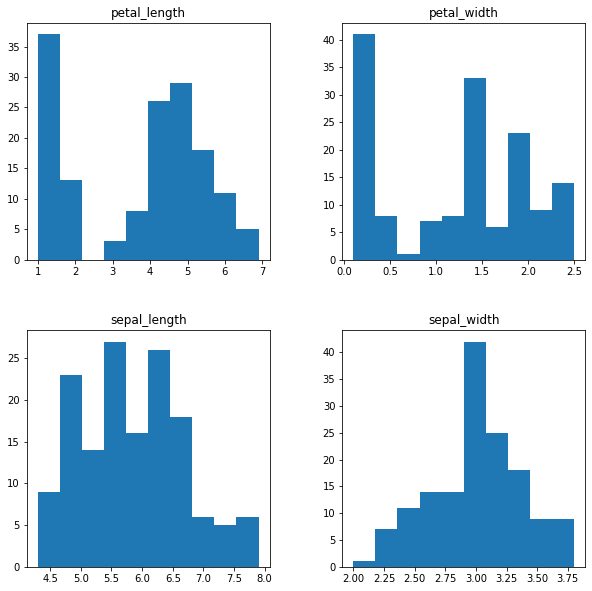

In [21]:
df.hist(figsize=(10,10),grid= False)
plt.show()

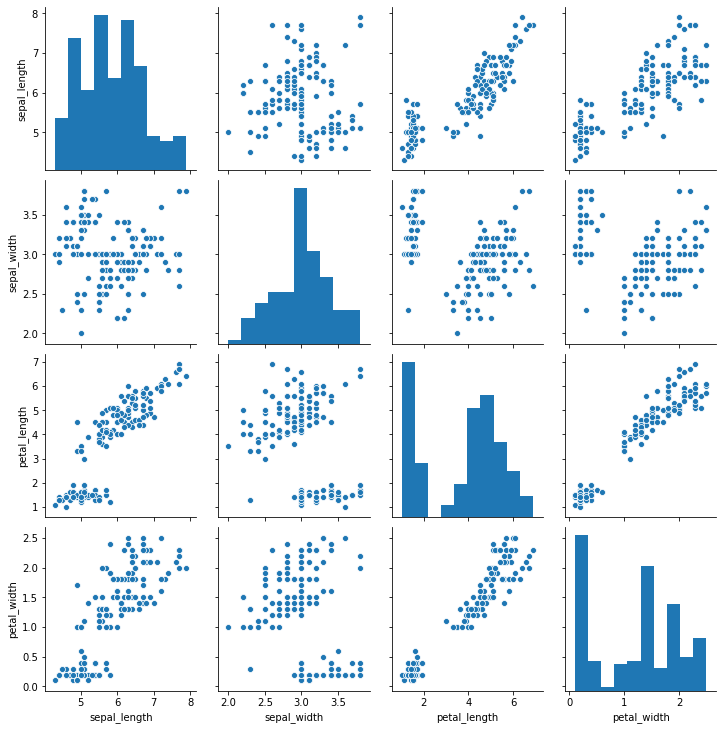

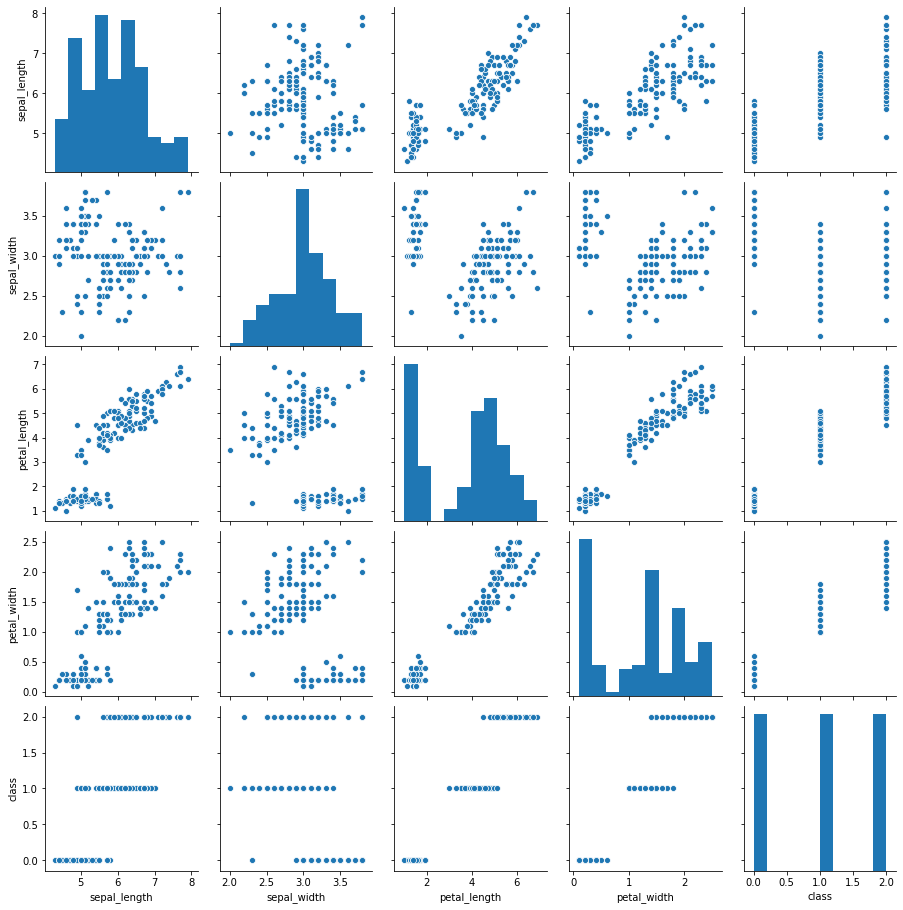

In [39]:
# plt.figure(figsize=(10,10));
# sns.pairplot(df,hue="class");
sns.pairplot(data=df.drop(columns=['class']))
sns.pairplot(data=df)


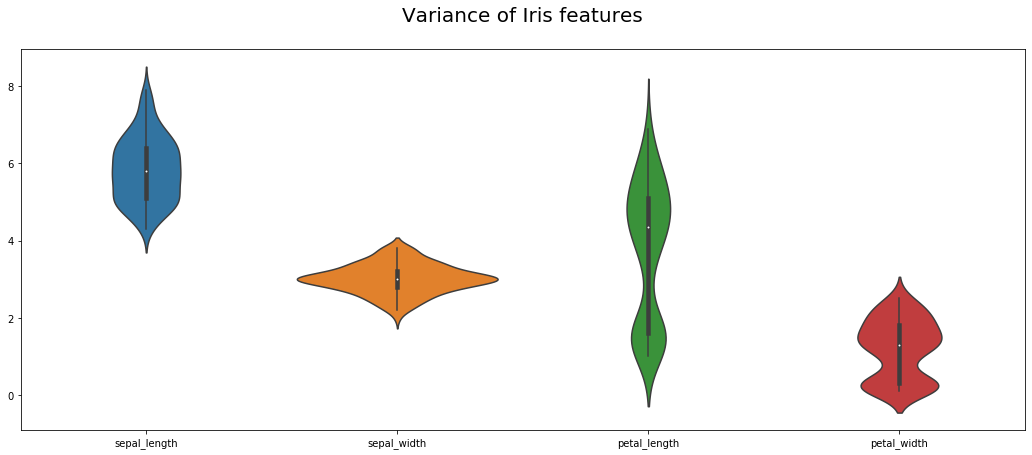

In [23]:
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()

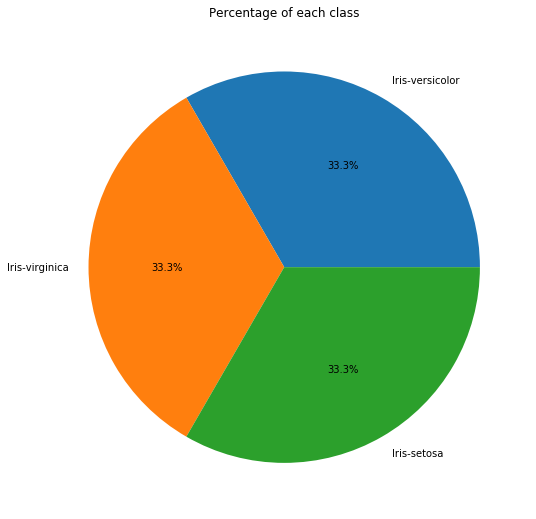

In [24]:
plt.figure(figsize=(9,9))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of each class")
plt.show()

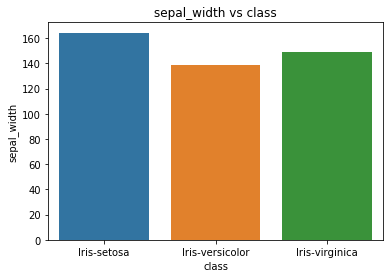

In [25]:
sns.barplot( x='class', y='sepal_width', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_width vs class ")
plt.show()


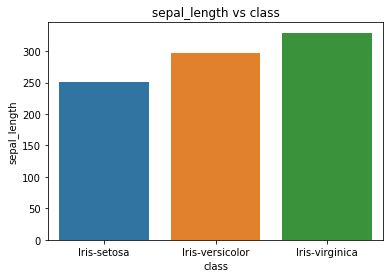

In [26]:
sns.barplot( x='class', y='sepal_length', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_length vs class ")
plt.show()


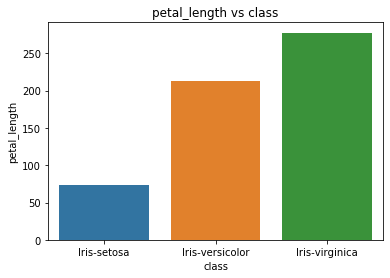

In [27]:
sns.barplot( x='class', y='petal_length', estimator = np.sum, data=df, ci=None)
plt.title("petal_length vs class")
plt.show()

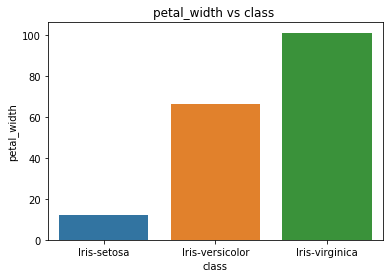

In [28]:
sns.barplot( x='class', y='petal_width', estimator = np.sum, data=df, ci=None)
plt.title("petal_width vs class ")
plt.show()

<h3>CORRELATION</h3>

In [30]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.079267,0.871754,0.817954
sepal_width,-0.079267,1.000000,-0.331077,-0.270844
petal_length,0.871754,-0.331077,1.000000,0.962757
petal_width,0.817954,-0.270844,0.962757,1.000000


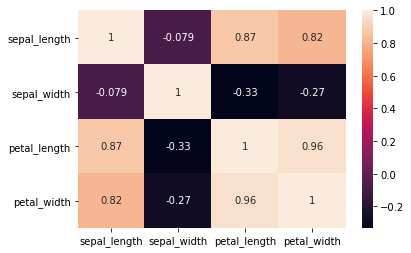

In [31]:
sns.heatmap(corr, annot=True);

<h3>MODEL BUILDING</h3>

<h3>LABEL ENCODING</h3>

In [32]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['class']=l.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>SPLITTING DATA INTO TRAINING AND TESTING</h3>

In [33]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["class"])
Y=df["class"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

<h3>MODEL TRAINING AND TESTING</h3>

<h3>LOGISTIC REGRESSION</h3>

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=150)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 80.0


<h3>K Nearest Neighbours</h3>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)


The accuracy of the model is : 93.33333333333333


<h3>DECISION TREE</h3>

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 80.0


<h3>RANDOM FOREST
</h3>

In [37]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 80.0


<h3>CONCLUSIONS
    :</h3>

This dataset is best predicted using a random forest or a decision tree classifier or KNeighbor classifier.